In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pyqtgraph as pg

In [3]:
1+1 

2

In [4]:
from github import Github

In [5]:
#g = Github("username", "password")

In [6]:
repo = g.get_repo("CSSEGISandData/COVID-19")

In [7]:
contents = repo.get_contents("")

In [8]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


In [9]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


In [10]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [11]:
count = 1
for index in contents:
    url = index.download_url
    print(count, url)
    count = count + 1

1 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
2 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
3 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
4 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
5 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
6 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
7 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
8 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_d

In [12]:
import bs4 as bs
import urllib.request

In [13]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv


In [16]:
print(files[63])

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
45001,Abbeville,South Carolina,US,2020-03-25 23:33:19,34.22333378,-82.46170658,3,0,0,0,"Abbeville, South Carolina, US"
22001,Acadia,Louisiana,US,2020-03-25 23:33:19,30.295064899999996,-92.41419698,2,0,0,0,"Acadia, Louisiana, US"
51001,Accomack,Virginia,US,2020-03-25 23:33:19,37.76707161,-75.63234615,2,0,0,0,"Accomack, Virginia, US"
16001,Ada,Idaho,US,2020-03-25 23:33:19,43.4526575,-116.24155159999998,24,0,0,0,"Ada, Idaho, US"
19001,Adair,Iowa,US,2020-03-25 23:33:19,41.33075609,-94.47105874,1,0,0,0,"Adair, Iowa, US"
21001,Adair,Kentucky,US,2020-03-25 23:33:19,37.10459774,-85.28129668,0,0,0,0,"Adair, Kentucky, US"
29001,Adair,Missouri,US,2020-03-25 23:33:19,40.19058551,-92.60078167,1,0,0,0,"Adair, Missouri, US"
40001,Adair,Oklahoma,US,2020-03-25 23:33:19,35.88494195,-94.65859267,2,0,0,0,"Adair, Oklahoma, US"
08001,Adams,Colorado,US,2020-03-25 23:33:19,39.87432092,-104.3362578,27

In [17]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [18]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
rec_dict      = {}
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does the recovered field have a number, sometimes it is '', empty
                if(len(data[recovered]) > 0):
                    # Is the number greater than zero
                    if (int(data[recovered]) > 0):
                        rec_dict.setdefault(key, []).append([sample,int(data[recovered])])
                    else:
                        rec_dict.setdefault(key, []).append([sample,0]) 
                else:
                    rec_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


In [19]:
state_conf_dict    = {}
state_death_dict   = {}

country_conf_dict  = {}
country_death_dict = {}
country_rec_dict   = {}
country_perc_dict  = {} 

Dcountry_conf_dict  = {}
Dcountry_death_dict = {}
Dcountry_rec_dict   = {}
Dcountry_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for city in conf_dict:
    state_conf_dict[city]   = np.zeros(days)
    state_death_dict[city]  = np.zeros(days)

for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_rec_dict[CNT]   = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    Dcountry_conf_dict[CNT]  = np.zeros(days-1)  
    Dcountry_death_dict[CNT] = np.zeros(days-1)
    Dcountry_rec_dict[CNT]   = np.zeros(days-1)
    Dcountry_perc_dict[CNT]  = np.zeros(days-1)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
     
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            rs = rec_dict[city][i][0]
            rv = rec_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            country_rec_dict[CNT][ rs ] = int(country_rec_dict[CNT][ rs ]) + int( rv )
    
            if ("US" in CNT):
                state_conf_dict[city][ cs ] = int(state_conf_dict[city][ cs ]) + int( cv )
                state_death_dict[city][ ds ] = int(state_death_dict[city][ ds ]) + int( dv )
        

# Look for unreported gaps is extend last measurement
# ....106. 108. 147. 171. 171. 171. 348.] becomes
# ....106. 108. 147. 171.  0.    0. 348.]
#
for CNT in country_dict:
    for i in range(0,len(country_rec_dict[CNT])):
        if (country_rec_dict[CNT][i] == 0) and (country_rec_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found recovered gaps for " + CNT + ", and corrected" )
             country_rec_dict[CNT][ i ] = country_rec_dict[CNT][ (i - 1) ]
        if (country_conf_dict[CNT][i] == 0) and (country_conf_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_conf_dict[CNT][ i ] = country_conf_dict[CNT][ (i - 1) ]
        if (country_death_dict[CNT][i] == 0) and (country_death_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_death_dict[CNT][ i ] = country_death_dict[CNT][ (i - 1) ]

# Calculate the percent death rate over time
#
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
   
# Calc Derivatives 
#
for CNT in country_dict:
    for i in range(1,len(country_rec_dict[CNT])):
        Dcountry_rec_dict[CNT][ i-1 ]   = (country_rec_dict[CNT][ i ]   - country_rec_dict[CNT][ i-1 ]) 
        Dcountry_conf_dict[CNT][ i-1 ]  = (country_conf_dict[CNT][ i ]  - country_conf_dict[CNT][ i-1 ])  
        Dcountry_death_dict[CNT][ i-1 ] = (country_death_dict[CNT][ i ] - country_death_dict[CNT][ i-1 ]) 
        Dcountry_perc_dict[CNT][ i-1 ]  = (country_perc_dict[CNT][ i ]  - country_perc_dict[CNT][ i-1 ])  


# Display the data
#
for CNT in country_dict:
    print(CNT)
    print(country_conf_dict[CNT])
    print(country_death_dict[CNT])
    print(country_rec_dict[CNT])
    print(country_perc_dict[CNT])   

68
China
[  547.   641.   918.  1404.  2070.  2871.  5502.  6080.  8134.  9795.
 11884. 16622. 19708. 23697. 27430. 30577. 34100. 36804. 39819. 42344.
 44376. 44749. 59885. 66348. 68403. 70503. 72424. 74201. 74609. 75067.
 75540. 76991. 77012. 77231. 77744. 78156. 78590. 78918. 79346. 79922.
 80126. 80251. 80376. 80527. 80680. 80760. 80813. 80850. 80877. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81397. 81496. 81591. 81661. 81782. 81897. 81999. 82122.]
[  17.   18.   26.   42.   56.   82.  131.  133.  171.  213.  259.  361.
  425.  491.  563.  633.  718.  805.  905. 1012. 1112. 1117. 1369. 1521.
 1663. 1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717.
 2746. 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123.
 3139. 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259.
 3265. 3274. 3281. 3285. 3291. 3296. 3299. 3304.]
[2.8000e+01 3.0000e+01 3.6000e+01 3.9000e+01 4.9000e+01 5.8000e+01
 1.0100e+02 1.2000e+02 1.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  3.  3.  1.  3.  2.  2.  3.  7.  7.  9. 11.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 4. 4. 4.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         14.28571429  9.09090909  6.25        4.76190476
  2.85714286  2.5         2.08333333  1.75438596  2.98507463  2.5
  2.5210084   2.15827338]
Guyana
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0

In [20]:
print(rec_dict['US-"Hillsborough  FL"'])
#print(rec_dict.keys())
print(country_rec_dict['US'])

[[40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0]]
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    3.    3.    3.    3.    3.    3.
    3.    3.    3.    3.    3.    3.    5.    5.    5.    5.    6.    6.
    6.    7.    7.    7.    7.    8.    8.    8.    8.    8.    8.    8.
    8.    8.   12.   12.   12.   12.   17.   17.  106.  108.  147.  171.
  171.  171.  348.  361.  681.  869. 1072. 2665.]


In [21]:
# Print the total number of reporting days we have
print(days)

68


In [22]:
# What is the bounding box for the map
BBox = ( float(min(lon, key=float)),float(max(lon, key=float)), float(min(lat, key=float)),float(max(lat, key=float)) )
print(BBox)

# Print all of the coordinants
for i in range(len(lon)):
    print(con[i],lon[i], lat[i])

(-170.132, -1.0232, -38.4161, 72.0)
84.0 -4.0 40.0
36.0 -3.0 55.0
14.0 -79.3832 43.6532
9.0 -122.3321 47.6062
8.0 -123.1207 49.2827
6.0 -78.1834 -1.8312
5.0 -102.0 23.0
3.0 -19.0208 64.9631
3.0 -87.6298 41.8781
3.0 -121.9552 37.3541
2.0 -51.9253 -14.235
2.0 -121.3542 38.4747
2.0 -120.9876 36.5761
2.0 -117.1611 32.7157
2.0 -121.8339 48.033
1.0 -73.5673 45.5017
1.0 -81.2453 42.9849
1.0 -70.1627 18.7357
1.0 -7.6921 53.1424
1.0 -71.0589 42.3601
1.0 -123.8695 40.745
1.0 -118.2437 34.0522
1.0 -89.4012 43.0731
1.0 -117.8531 33.7879
1.0 -122.675 45.5051
1.0 -71.4128 41.824
1.0 -98.4936 29.4241
1.0 -111.94 33.4255
0.0 -98.6134 29.3829
0.0 -95.9758 41.2545
0.0 -121.9399 38.2721
120.0 -4.0 40.0
40.0 -3.0 55.0
17.0 -79.3832 43.6532
14.0 -121.9836 47.548
9.0 -121.9552 37.3541
8.0 -123.1207 49.2827
6.0 -78.1834 -1.8312
6.0 -19.0208 64.9631
5.0 -102.0 23.0
4.0 -87.6976 41.7377
4.0 -121.8339 48.033
2.0 -51.9253 -14.235
2.0 -8.2245 39.3999
2.0 -122.675 45.5051
2.0 -71.4128 41.824
2.0 -121.3542 38.4747


18.0 -98.2681 41.1254
17.0 -69.3819 44.6939
17.0 -71.5639 43.4525
17.0 -106.2485 34.8405
17.0 -66.5897 6.4238
15.0 -1.5616 12.2383
15.0 -61.0242 14.6415
13.0 -89.6787 32.7416
12.0 -72.7107 44.0459
11.0 -63.5887 -16.2902
11.0 -70.1627 18.7357
11.0 -53.1258 3.9339
11.0 -96.7265 38.5266
10.0 -77.2975 18.1096
10.0 -96.9289 35.5653
10.0 -99.4388 44.2998
8.0 -58.4438 -23.4425
8.0 -75.5071 39.3185
8.0 -55.7658 -32.5228
7.0 -98.8139 53.7609
7.0 -106.4509 52.9399
7.0 -157.4983 21.0943
7.0 -110.4544 46.9219
6.0 -66.4619 46.5653
6.0 -1.0232 7.9465
6.0 -61.551 16.265
6.0 -86.2419 15.2
6.0 -92.2884 38.4561
6.0 -2.3644 49.3723
5.0 -63.7443 44.682
5.0 -53.0 4.0
5.0 -114.4788 44.2405
5.0 -66.5901 18.2208
4.0 -77.7812 21.5218
4.0 -58.9302 4.8604
4.0 -61.2225 10.6918
3.0 -149.4068 -17.6797
3.0 -61.5833 16.25
3.0 -62.8333 17.9
3.0 -66.5 18.2
3.0 -107.3025 42.756
2.0 -69.9683 12.5211
2.0 -122.6655 37.6489
2.0 -63.0501 18.0708
2.0 -90.2308 15.7835
2.0 -2.11 49.19
2.0 -60.9789 13.9094
1.0 -61.7964 17.0608
1

3.0 -81.17477045 35.29373559
3.0 -77.37353178 35.59535426
3.0 -78.82623165 35.04762133
2.0 -77.08398081 35.11833364
2.0 -81.70033724 36.23103603
2.0 -79.48474178 35.30885257
2.0 -80.52446628 35.64003916
2.0 -79.39976137 36.0434701
1.0 -78.00027268 35.36438125
1.0 -78.36914061 34.98820368
1.0 -81.21740317 35.48508185
1.0 -79.23651674 35.01888303
1.0 -80.21256572 35.79115496
1.0 -76.25134778 36.26723798
1.0 -79.17569362 35.47623147
1.0 -81.2132617 35.66211129
1.0 -76.60118385 36.12908077
1.0 -82.4766782 35.33788927
1.0 -79.1025053 34.64244496
1.0 -76.15180542 35.42017674
1.0 -78.65184241 36.30337451
1.0 -80.54496571 35.93099927
1.0 -79.90416657 35.33155144
1.0 -77.98422508 35.96575634
1.0 -79.4757978 34.8386299
83.0 -77.20358245 39.13676329
40.0 -76.8496441 38.83070039
28.0 -76.62911955 39.45784712
24.0 -76.61151012 39.30211911
24.0 -76.93126208 39.25305293
18.0 -76.60329337 39.00670238
5.0 -76.3077594 39.55010644
5.0 -76.98580666 38.51092331
4.0 -77.02373735 39.56453592
2.0 -76.56820632

0.0 -91.79351727 37.87736118
0.0 -91.16980779 39.34310674
0.0 -94.77068479 39.38154439
0.0 -93.39828174 37.6162296
0.0 -93.02042674 40.47942497
0.0 -91.51838643 39.52817427
0.0 -92.4971374 39.44007257
0.0 -93.98905745 39.3537468
0.0 -90.97009925 37.36085952
0.0 -90.85990261 36.65460667
0.0 -93.20259964 39.13734288
0.0 -92.52311943 40.46921489
0.0 -92.14709064 40.45214695
0.0 -91.40190382 37.15772072
0.0 -92.07634971 39.79742518
0.0 -93.77631447 38.03699437
0.0 -90.47598685 37.81214171
0.0 -90.1949941 37.89090059
0.0 -89.9444155 36.85571651
0.0 -93.45256475 36.75000327
0.0 -93.11150106 40.2099105
0.0 -93.04075153 36.65465345
0.0 -91.96564727 37.31728859
0.0 -94.34127305 37.8457799
0.0 -91.16124662 38.76529479
0.0 -90.87948158 37.96130078
0.0 -90.46001416 37.11303869
0.0 -92.876329 37.2813734
0.0 -94.42328751 40.47945588
0.0 -92.46914488 37.27029221
0.0 -112.8984694 45.13434354
0.0 -107.492347 45.42335905
0.0 -108.9582723 48.43175214
0.0 -109.0274047 45.22850116
0.0 -104.5395536 45.51979

4.0 -90.87372121 33.79696941
0.0 -90.02725304 37.32449052
1.0 -97.88592746 42.98914167
0.0 -89.43534887 38.88829622
0.0 -116.6017932 48.29996017
0.0 -111.6161537 43.38713372
1.0 -93.09374925 36.3084504
0.0 -88.82345779 42.32359279
3.0 -86.46841646 40.0509304
0.0 -93.9313999 42.03657094
0.0 -84.72615357 38.97065142
17.0 -92.30723575 38.99186229
0.0 -98.06737183 41.70759415
0.0 -81.69888019 38.01974191
0.0 -101.43165090000001 32.74363984
0.0 -97.63613524 31.89978581
12.0 -93.60460152 32.67932307
1.0 -79.80982182 37.55531756
0.0 -100.8378166 48.79106111
39.0 -105.3546767 40.09313619
0.0 -116.4630179 48.76684761
1.0 -94.84865997 37.85508555
2.0 -84.21827874 38.2054607
1.0 -94.41834132 33.44626922
0.0 -103.5203343 46.11285362
0.0 -103.08788340000001 42.22079243
1.0 -113.08328159999999 41.52106798
0.0 -82.68652187 38.36176608
0.0 -98.76486568 42.899727399999996
0.0 -84.8633779 37.62680923
0.0 -84.08532444 38.69158994
1.0 -82.16611613 29.95079741
0.0 -76.51570822 41.78869215
4.0 -92.15980837 

0.0 -86.65158371 32.1597283
8.0 -83.27056716 30.83568832
6.0 -88.44191529999998 33.47386518
9.0 -101.82047890000001 33.61008596
0.0 -93.32780803 41.02958964
10.0 -83.65468618 41.62101218
0.0 -85.54471223 46.47227431
2.0 -84.00425681 34.57286511
0.0 -107.75088259999998 32.18179341
0.0 -78.24133319 36.94618528
10.0 -75.98447579 41.17823008
0.0 -77.06629984 41.34310539
1.0 -99.85201878 43.89522709
0.0 -79.19888138 37.40021399
0.0 -101.8162849 33.17657705
0.0 -96.20926845 43.38107862
2.0 -96.15275715 38.45576156
1.0 -88.07886257 37.02080035
0.0 -95.83806103 44.41327865
0.0 -119.18704790000001 39.01777974
0.0 -85.04980537 46.07028979
175.0 -82.92752801 42.69158356
0.0 -85.69267724 32.38759944
0.0 -84.04234127 32.35207048
0.0 -88.96342505 39.86064913
0.0 -92.56453089 39.83049768
0.0 -83.41696617 35.14867843
0.0 -86.00778595 36.53157855
0.0 -89.92424028 39.26119767
3.0 -119.76655890000002 37.21513971
21.0 -86.55069633 34.76327133
0.0 -93.72524943 36.01038185
0.0 -83.47398594 30.44396917
1.0 -

2.0 -92.41419698 30.295064899999996
1.0 -75.63234615 37.76707161
19.0 -116.24155159999998 43.4526575
1.0 -94.47105874 41.33075609
0.0 -85.28129668 37.10459774
1.0 -92.60078167 40.19058551
0.0 -94.65859267 35.88494195
25.0 -104.3362578 39.87432092
0.0 -116.4545247 44.89333571
1.0 -91.18786813 39.98815591
1.0 -84.93671406 40.7457653
0.0 -94.69932645 41.02903567
2.0 -91.35326037 31.47669768
1.0 -98.50117804 40.52449420000001
0.0 -102.5285397 46.09686891
0.0 -83.4718964 38.84541072
6.0 -77.21610347 39.87140411
1.0 -118.56017340000001 46.98299757
0.0 -89.76782777 43.96974651
8.0 -73.14130877 44.03217337
2.0 -81.63645384 33.54338026
0.0 -93.41168259999999 46.60962049
37.0 -82.35928158 29.67866525
3.0 -79.39976137 36.0434701
135.0 -121.8929271 37.64629437
0.0 -105.7885451 37.57250606
146.0 -73.97723916 42.60060306
0.0 -105.72354150000001 41.65498705
2.0 -78.55481085 38.02080697
0.0 -83.59507875 44.6846864
0.0 -88.57996173 34.88084463
0.0 -161.9722021 55.32222414
0.0 -110.4086433 52.72541116
0

0.0 -98.20756994 39.04549684
0.0 -84.6565327 37.45475628
2.0 -92.66597409999999 32.6003154
5.0 -69.54227124 44.05996956
0.0 -96.26688165 44.41311883
4.0 -90.45391915 31.53288662
0.0 -90.95588181 39.05345619
0.0 -115.4046155 48.54265777
3.0 -100.74753740000001 41.04658298
0.0 -114.8790388 37.64268459
0.0 -105.4586166 33.74526079
1.0 -81.21740317 35.48508185
0.0 -96.8812462 35.70270942
0.0 -123.86991200000001 44.64252874
0.0 -96.72039050000001 43.27841182
1.0 -86.58910106 35.13738622
1.0 -118.41943880000001 47.57705241
0.0 -82.07017953 38.172154
0.0 -89.73411273 45.33737523
0.0 -110.6563997 42.26376367
6.0 -91.59809485 42.07923082
2.0 -94.84254089 38.21267844
0.0 -93.10704106 39.87001769
21.0 -122.53731540000001 44.48899494
0.0 -100.27331509999999 36.27783108
22.0 -73.2451475 41.7937534
0.0 -94.23468591 33.70375665
0.0 -98.1246786 28.35101362
1.0 -88.55784752 40.89188292
0.0 -88.34797529 37.21137452
6.0 -90.73061664 30.44143993
13.0 -83.91297209 42.60302282
0.0 -93.54645978 39.78110272
3

588.0 -85.3232 51.2538
3.0 -63.4168 46.5107
39.0 -66.5901 18.2208
1013.0 -73.5491 52.9399
3.0 -62.8333 17.9
72.0 -106.4509 52.9399
2.0 -63.0548 18.0425
8.0 -63.0501 18.0708
17.0 -64.8963 18.3358
3.0 -61.7964 17.0608
387.0 -63.6167 -38.4161
5.0 -78.035889 25.025885
18.0 -59.5432 13.1939
1.0 -88.4976 17.1899
29.0 -63.5887 -16.2902
2247.0 -51.9253 -14.235
114.0 -1.5616 12.2383
3.0 -23.0418 16.5388
922.0 -71.543 -35.6751
378.0 -74.2973 4.5709
177.0 -83.7534 9.7489
73.0 -5.5471 7.54
48.0 -77.78116700000002 21.521757
2.0 -61.371 15.415
312.0 -70.1627 18.7357
1082.0 -78.1834 -1.8312
5.0 -88.8965 13.7942
3.0 -15.3101 13.4432
53.0 -1.0232 7.9465
1.0 -61.678999999999995 12.1165
21.0 -90.2308 15.7835
4.0 -9.6966 9.9456
5.0 -58.93018000000001 4.860416000000002
7.0 -72.2852 18.9712
30.0 -86.2419 15.2
648.0 -19.0208 64.9631
1329.0 -7.6921 53.1424
21.0 -77.2975 18.1096
3.0 -9.429499 6.4280550000000005
2.0 -10.9408 21.0079
367.0 -102.5528 23.6345
170.0 -7.0926 31.7917
2.0 -85.207229 12.865416
345.0 -8

43.0 -105.4625784 40.66671597
0.0 -85.70138352 37.54567114
0.0 -104.03764579999999 37.3153406
0.0 -120.59350990000002 40.67311306
0.0 -116.71136979999999 46.81587887
0.0 -95.25215049 34.87844729
6.0 -87.65624729 34.90171875
0.0 -88.66229662 32.40419769
0.0 -89.63015909999999 35.75893438
1.0 -84.11321779 37.10975748
6.0 -82.92221316 32.46325233
0.0 -82.00490796 34.48244419
1.0 -96.93186692 29.38508402
0.0 -87.31069453 34.52041498
0.0 -91.10867198 36.04188196
0.0 -87.72884035 38.71987914
1.0 -86.48361629 38.84112637
0.0 -82.72882223 38.07136018
3.0 -90.10841127 31.55147224
0.0 -93.83293097 37.10626634
1.0 -82.53466552 38.59743452
1.0 -80.33393706 40.99206278
0.0 -103.79294279999999 44.35919441
0.0 -87.39787695 35.21675201
0.0 -94.70392124 34.89851864
6.0 -93.72844721 44.37136597
1.0 -103.4123733 32.79215361
3.0 -89.52402044 32.7536828
11.0 -95.03620809 39.20183497
3.0 -76.45651841 40.36680311
40.0 -85.35132246 32.60154883
0.0 -90.78383866 34.78498904
42.0 -81.88399313 26.58410348
25.0 -8

0.0 -81.12857041 36.49360862
0.0 -80.00222498 37.78636074
133.0 -79.98167747 40.46809875
8.0 -85.06800636 41.09194313
0.0 -95.30030847 37.88582951
1.0 -86.19457544 36.75197631
5.0 -92.82442028 30.65385745
0.0 -84.10802343 40.77285242
0.0 -81.35321066 32.98837386
0.0 -83.62212411 45.03477666
0.0 -119.82235940000001 38.59678594
2.0 -120.65696000000001 38.44583082
1.0 -77.98584649 37.34081025
1.0 -79.14548696 37.60308293
1.0 -90.80501621 31.17467303
28.0 -149.14269860000005 61.14998174
0.0 -95.29272815 38.21413251
2.0 -84.99171713 38.00671029
19.0 -82.63959517 34.51828081
3.0 -84.19965764 36.12684348
0.0 -95.65354823 31.81534745
0.0 -94.80163024 39.98492163
0.0 -102.63765479999999 32.30468633
5.0 -70.20380627 44.1664747
1.0 -94.60901487 31.25457347
41.0 -76.60329337 39.00670238
8.0 -93.24604565 45.27476015
0.0 -80.09953279 34.97403241
0.0 -98.06662829999999 42.17695516
0.0 -85.15503082 44.99690221
9.0 -109.4892383 35.39465006
1.0 -92.86865906 40.74324454
0.0 -82.28909114 31.74847232
0.0 -

0.0 -93.10704106 39.87001769
26.0 -122.53731540000001 44.48899494
0.0 -100.27331509999999 36.27783108
44.0 -73.2451475 41.7937534
0.0 -94.23468591 33.70375665
0.0 -98.1246786 28.35101362
1.0 -88.55784752 40.89188292
0.0 -88.34797529 37.21137452
11.0 -90.73061664 30.44143993
21.0 -83.91297209 42.60302282
0.0 -93.54645978 39.78110272
3.0 -77.77966158 42.72596275
2.0 -98.68475262 30.70645047
0.0 -93.71951016 35.21413234
2.0 -103.110817 40.7249637
1.0 -89.36638784 40.12581572
0.0 -101.148475 38.91735806
1.0 -86.877635 36.85949479
0.0 -100.4817851 41.56650314
0.0 -99.47719806 46.45729487
2.0 -83.76784341 40.38996525
3.0 -97.44352845 35.91899576
1.0 -81.93528571 37.8299889
1.0 -81.74952375 31.75218791
1.0 -91.88742357 34.75392199
44.0 -82.15083537 41.29553751
0.0 -106.31349850000001 35.86631386
1229.0 -118.22824109999999 34.30828379
6.0 -84.31145275 35.73939663
28.0 -77.63481877 39.08990083
0.0 -91.26102611 41.21842119
4.0 -77.96274807 37.97850256
0.0 -99.45440415 41.91371961
0.0 -97.2390678

54.0 -116.24155159999998 43.4526575
1.0 -94.47105874 41.33075609
0.0 -85.28129668 37.10459774
1.0 -92.60078167 40.19058551
3.0 -94.65859267 35.88494195
50.0 -104.3362578 39.87432092
0.0 -116.4545247 44.89333571
1.0 -91.18786813 39.98815591
1.0 -84.93671406 40.7457653
0.0 -94.69932645 41.02903567
6.0 -91.35326037 31.47669768
1.0 -98.50117804 40.52449420000001
0.0 -102.5285397 46.09686891
0.0 -83.4718964 38.84541072
8.0 -77.21610347 39.87140411
3.0 -118.56017340000001 46.98299757
0.0 -89.76782777 43.96974651
13.0 -73.14130877 44.03217337
6.0 -81.63645384 33.54338026
0.0 -93.41168259999999 46.60962049
57.0 -82.35928158 29.67866525
5.0 -79.39976137 36.0434701
220.0 -121.8929271 37.64629437
0.0 -105.7885451 37.57250606
187.0 -73.97723916 42.60060306
1.0 -105.72354150000001 41.65498705
8.0 -78.55481085 38.02080697
0.0 -83.59507875 44.6846864
0.0 -88.57996173 34.88084463
0.0 -161.9722021 55.32222414
0.0 -110.4086433 52.72541116
0.0 -89.32910838 37.18049267
0.0 -81.17751948 35.922379600000006


0.0 -94.01554631 41.33081904
2.0 -84.27220275 37.71659336
1.0 -91.23973355 32.36918118
25.0 -90.03513564 32.63389156
0.0 -90.34671429999999 37.47865134
2.0 -111.9173017 45.30080065
1.0 -97.6005481 41.91676024
17.0 -75.67266639 42.91653905
0.0 -82.71346418 35.85402722
3.0 -83.40178317 39.89381073
3.0 -88.84076036 35.61181957
0.0 -95.93003775 30.96694679
2.0 -78.28220331 38.41531222
0.0 -83.0657714 37.70820545
2.0 -92.64083907 41.33521503
1.0 -95.80921485 47.32557075
68.0 -80.77287029 41.01631101
0.0 -98.53467076 36.31149996
0.0 -117.62273950000001 43.1937027
0.0 -77.48509905 38.7464321
0.0 -77.44399307 38.77058531
28.0 -82.31831044 27.47196942
1.0 -86.05626916 44.33352407
0.0 -87.80928853 44.11946801
1.0 -89.75863384 44.89792533
2.0 -87.78796182 32.24767634
399.0 -112.49181540000001 33.34835867
0.0 -91.92249662 38.16193985
65.0 -122.72106310000001 38.07122463
1.0 -88.03324599999998 45.38553432
7.0 -87.88704173 34.13697363
0.0 -92.68451899 36.26844485
8.0 -82.05803627 29.21227113
0.0 -84

61.0 -95.44563172 29.18757369
40.0 -96.30205577 30.663644800000004
2.0 -83.31959161 37.52333168
0.0 -86.42885017 37.77377239
0.0 -92.31795937 42.77461496
26.0 -80.73091022 28.29409504
0.0 -103.25203259999999 29.81008251
0.0 -101.2084947 34.53026962
179.0 -71.10872211 41.79228404
6.0 -71.28652315 41.71018079
1.0 -82.16359122 36.616302399999995
0.0 -156.701064 58.74513976
2.0 -111.49558130000001 46.33277565
0.0 -73.86282755 40.85209301
0.0 -80.57915332 40.27367263
1.0 -96.79079945 44.36974375
0.0 -83.58303423 30.83922642
0.0 -98.21808402 27.03103197
23.0 -75.81326086 42.15903158
13.0 -105.0566324 39.95998787
814.0 -80.48725556 26.15184651
0.0 -90.75068024 39.96209138
2.0 -86.22868909 39.19605589
0.0 -95.56421698 39.82652589
0.0 -94.72562874 44.24205652
0.0 -99.92904055 42.43018907
0.0 -83.86788395 38.93416837
2.0 -98.35165355 45.58994323
3.0 -98.99907113 31.77430356
6.0 -88.00411844 44.452655299999996
0.0 -99.08118954 43.71756379
12.0 -78.22814204 34.070565
0.0 -77.8593436 36.76366949
6.

0.0 -97.60992207 44.02197882
0.0 -106.92816979999999 37.66954283
0.0 -115.00152390000001 47.15283992
0.0 -118.4344506 38.53841696
0.0 -78.94104895 39.41561583
0.0 -82.13338365 37.73048351
0.0 -113.6357257 42.85518524
21.0 -96.7910885 43.67441641
1.0 -85.09256478 44.33772443
0.0 -90.05194370000002 35.76271485
0.0 -89.29505753 36.82516239
9.0 -113.92135079999998 47.03728583
14.0 -84.19381821 31.22483255
0.0 -92.78887719 43.35638371
2.0 -98.20906732 39.39331582
1.0 -82.1582442 36.01059309
0.0 -100.9212058 32.30623474
29.0 -88.20842409 30.78472347
0.0 -120.7244817 41.58965602
0.0 -108.2070876 40.61810999
5.0 -113.7577902 35.70471703
3.0 -92.57976951 38.63571781
781.0 -74.22240686 40.26549699
8.0 -118.8872409 37.93899289
2.0 -95.95743843 42.05220391
23.0 -80.04766838 39.63218457
1.0 -87.36995001 31.56729412
0.0 -91.20540287 34.6815935
20.0 -81.07812416 25.20904673
3.0 -83.92097166 33.014289
3.0 -90.17761038 38.27594376
16.0 -86.52414358 39.16130004
0.0 -92.8690667 41.02988815
0.0 -85.715964

163.0 -74.96388753 39.80343818
0.0 -76.15568396 36.33804939
0.0 -93.19310676 29.87592238
1.0 -78.20376845 41.43625568
20.0 -97.48140372 26.14524221
0.0 -94.97790104 32.97195142
4.0 -84.37875208 38.94384345
0.0 -100.0510181 45.77074915
4.0 -84.15108559999999 36.40355516
0.0 -79.09678609 37.20553386
1.0 -105.54744040000001 44.24886082
12.0 -97.98465569 35.5426055
1.0 -82.07702563 32.40209349
2.0 -86.05738983 35.80990797
22.0 -116.70954990000001 43.61970148
5.0 -89.6843587 37.38489388
9.0 -74.80170244 39.15008829
0.0 -109.0274047 45.22850116
9.0 -75.7068525 40.91545395
0.0 -110.58725120000001 39.64834818
3.0 -106.9326084 41.69357844
0.0 -111.5597683 42.77149116
0.0 -88.96692220000001 36.85372876
0.0 -92.67601019 46.59180601
3.0 -75.82904158 38.87172293
0.0 -77.34901405 38.02679129
0.0 -93.54270261 36.34038560000001
64.0 -85.07976677 33.58138199
1.0 -89.93395545 42.06823429
1.0 -86.56198812 40.580783200000006
1.0 -94.86032705 42.03617207
1.0 -85.12601074 38.66599534
82.0 -77.02373735 39.56

8.0 -84.87142262 32.50931999
13.0 -86.15176712 43.29123859
2.0 -81.94363275 39.96575964
7.0 -95.37802952 35.61318461
0.0 -108.39498 46.49684637
2.0 -94.61803994 31.62017125
0.0 -97.99327291 41.39750195
0.0 -70.08774729 41.2942019
10.0 -122.33283899999999 38.50735751
4.0 -77.98422508 35.96575634
7.0 -81.80297522 30.61037141
6445.0 -73.58941873 40.74066522
2.0 -93.09816516 31.72321584
8.0 -106.79788500000001 42.96180148
62.0 -110.3218983 35.3997715
1.0 -96.47428766 32.04620681
2.0 -85.4657193 37.80335779
0.0 -98.19038437 47.9226426
2.0 -78.88498513 37.78790447
0.0 -96.01392079 39.78345387
1.0 -95.85433992 40.38514847
1.0 -95.30670046 37.55862897
4.0 -89.11726492 32.75339664
0.0 -99.91547333 38.47974157
1.0 -93.30632432 33.66340119
12.0 -120.76272809999999 39.30394768
141.0 -75.64054974 39.57992638
25.0 -77.87075626 34.25758282
280.0 -72.93620426 41.408032500000004
1.0 -76.99828634 37.50694406
20.0 -72.10430976 41.48896435
0.0 -89.66070007 36.59666326
33768.0 -73.97152637 40.7672726000000

In [23]:
BBox =  (-128, -64, 24, 49)
print(BBox)

(-128, -64, 24, 49)


In [24]:
repo = g.get_repo("ehsintegration/COVID-19")
contents = repo.get_contents("us-map.png")
url = contents.download_url
print(url)
usmap = plt.imread(url)

https://raw.githubusercontent.com/ehsintegration/COVID-19/master/us-map.png


<IPython.core.display.Javascript object>


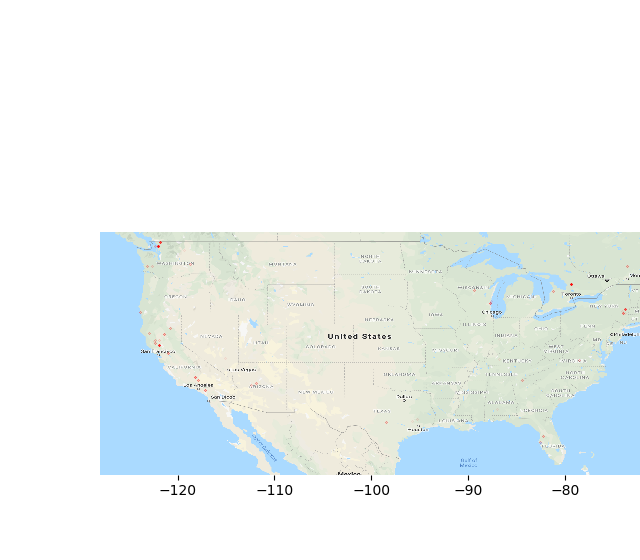

C:\Users\ediaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


KeyboardInterrupt: 

In [25]:

fig, ax = plt.subplots(figsize = (8,7))
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

plt.ion()
fig.show()
fig.canvas.draw()
ax.imshow(usmap, extent = BBox, aspect= 'equal')

# Wait so I had time to setup CAMSTASIA
time.sleep(2)

# Get the maximum Confirmed case
mxc = max(con, key=int)

# Iterate through all of the coordinates
for i in range(0,len(con),1):
    
    # This will normalize the confirmed case to 1 , and then multiply by 300
    data_con = (con[i] / mxc) * 300
    
    # Get the current coordinates
    data_lon = lon[i]
    data_lat = lat[i]
    
    ax.scatter(data_lon, data_lat, zorder=1, alpha= 1.0, c='R', s=data_con)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # This slows the plot down so that we can see time progress
    # also matplotlib needs a sleep for an continuous plot.
    #time.sleep(0.00001)   #sleep

# Wait so I had time to stop CAMSTASIA
time.sleep(3)

# Clear the figure
fig.clf()